# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# complete the code below to load the dataset
df = pd.read_csv('/content/drive/MyDrive/Python Course/Business Statistics/Project 2 _ Business Statistics _ E-news Express/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English




*  Each entry contains the user id, the group to which the subject belongs (control or treatment), the landing page to which they were assigned, the time spent on the page, status information on whether they were converted or not, and their preferred language.
*   The data appears to consist of a sample of 100 entries considering that the indices range from 0 to 99





#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(100, 6)



*   The data consists of 6 columns and we have confirmation that it also consists of 100 rows





#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB




*  The data collected contains 4 categorical columns (group, landing_page, converted, and language_preferred) and 2 numerical columns (user_id containing integer values and time_spent_on_the_page containing float values)


#### Getting the statistical summary for the numerical variables

In [ ]:
# write your code here to print the numerical summary statistics
df.describe(include = np.number)

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000




*   The user id is a unique identifier; thus no interesting insight can be gained from statistical analysis of its values
*   The subjects spent about 5 minutes 23 seconds (5.38 minutes) on average on the landing pages
*  The spread of the time spent on the landing pages is characterized by a range from about 11 seconds (0.19 minutes) to 10 minutes 42 seconds (10.71 minutes) and a standard deviation of about 2 minutes 23 seconds (2.38 minutes)
*   The average and median time spent on the landing pages are close, suggesting that the distribution is at least slightly normal





#### Getting the statistical summary for the categorical variables

In [ ]:
# write your code here to print the categorical summary statistics
df.describe(include = object)

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34




*   We have confirmation that the sample was split into two equal groups of 50 subjects each (control and treatment)
*  The number of subjects assigned to the old landing page is also equal to that of subjects assigned to the new landing page
*   The number of subjects converted is slightly greater (54%) than those not converted
*   The most preferred language among the 3 registered languages is Spanish (34%)




### Check for missing values

In [ ]:
# write your code here
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64



*   The data contains no null values



### Check for duplicates

In [ ]:
# write your code here
df.duplicated().sum()

0



*   There are no duplicate rows



### Univariate Analysis

#### Time spent on the page

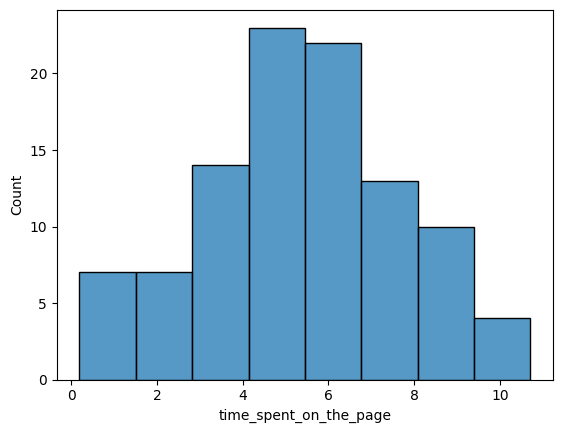

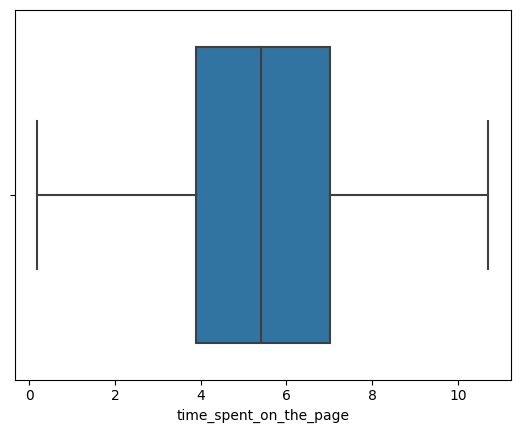

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()



*   We have confirmation that the distribution of the time spent on the landing pages is approximately normal
*   The time spent on the landing pages has no outliers
*   Half of the subjects spent between 4 and 7 minutes on the landing pages and half also spent more 5 minutes



#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

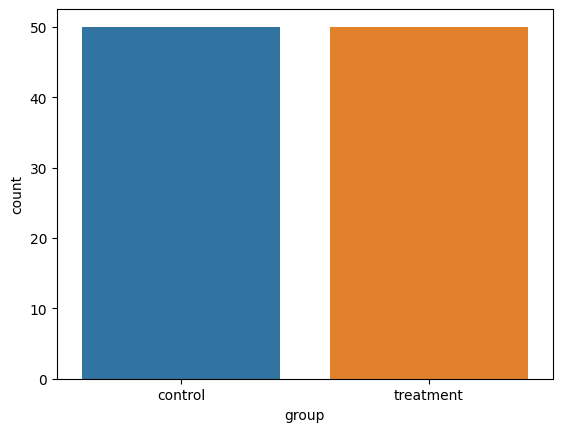

In [ ]:
sns.countplot(data=df,x='group')
plt.show()



*   We have confirmation that the subjects are equally distributed between the control and treatment groups



#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

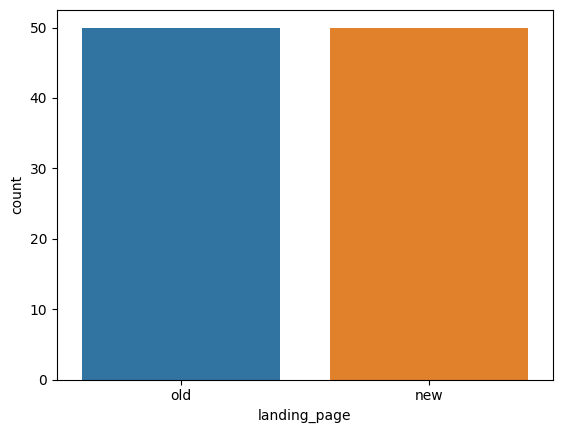

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()



*   We also have confirmation that the subjects are equally distributed between the old and new landing pages



#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

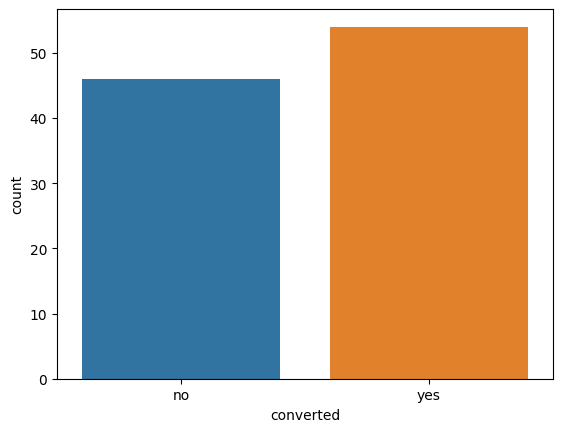

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()



*   The ratio of subjects converted to those not converted is 27:23



#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

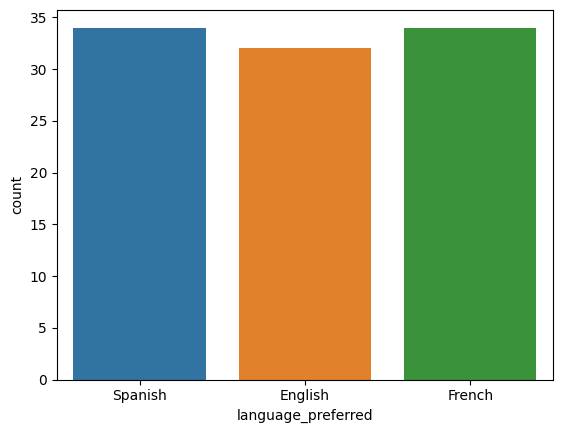

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()



*   We now have a clearer perspective on the distribution of preferred languages: Both Spanish and French are the favorite languages among the subjects (34 each) while English was the preferred language of only 32 subjects



### Bivariate Analysis

#### Landing page vs Time spent on the page

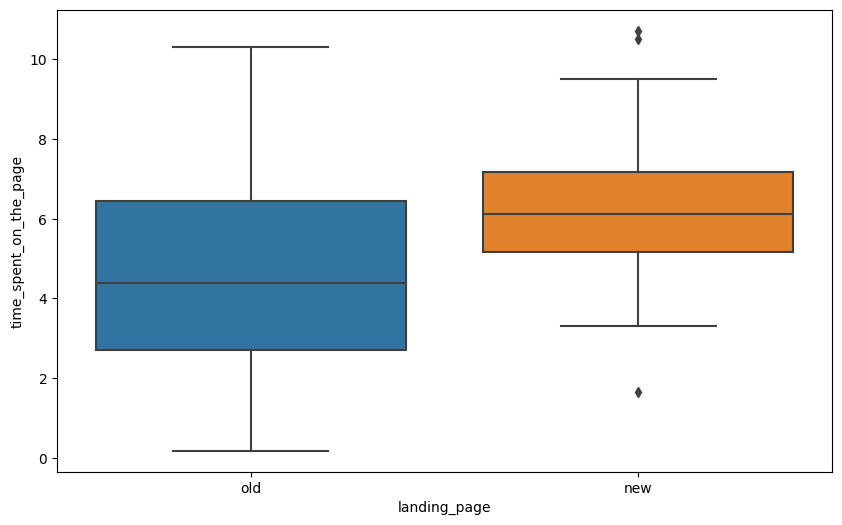

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()



*   Subjects assigned to the new landing page tended to spend close to two more minutes on the landing page than those assigned to the old landing page
*   Much larger variability was observed on the time spent on the landing page by the subjects assigned to the old landing page
*   Some outliers were registered on both sides of the distribution of the time spent on the landing page by subjects assigned to the new landing page

#### Conversion status vs Time spent on the page

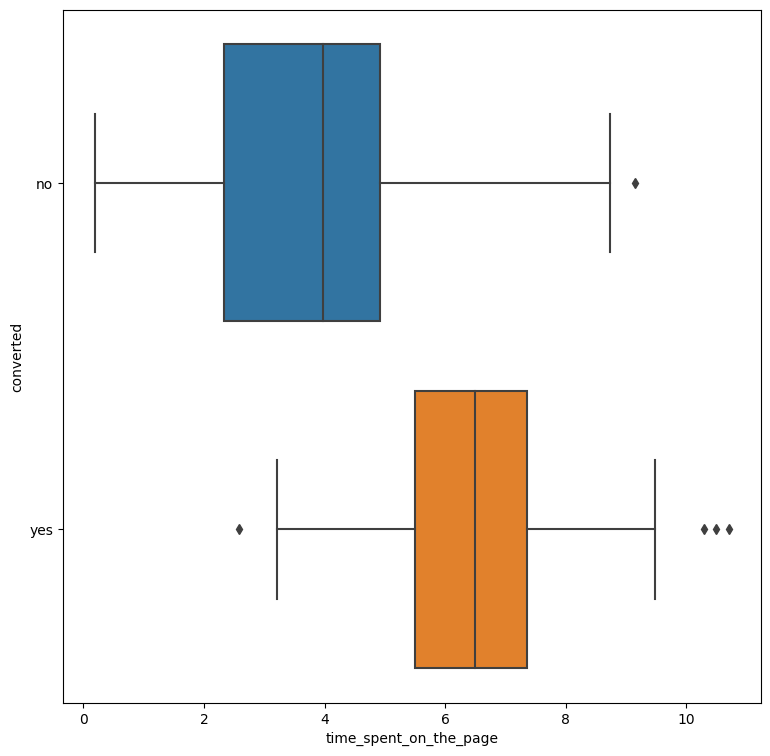

In [ ]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'converted')
plt.show()



*   Converted subjects, in general, spent over two more minutes on the landing page than unconverted ones
*   A much larger variability of the time spent on the landing page was registered for unconverted subjects
*  Outliers of time spent on the landing page was registered for both converted and unconverted subjects; converted subjects appear to have many more outliers

#### Language preferred vs Time spent on the page

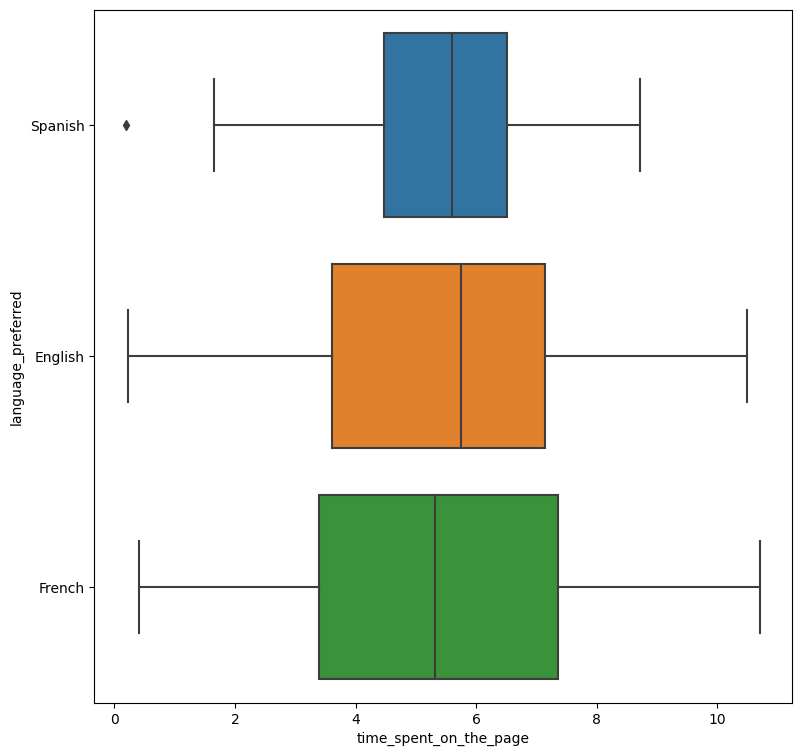

In [ ]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()



*  Subjects having English as preferred language spent the most time on the landing page, closely followed by those whose preferred language is Spanish;the least time spent on the landing page was registered for subjects whose preferred language is French but the differences among the time spent by subjects of the three languages are a few seconds apart
*  The greatest variability of time spent on the landing page was registered for subjects whoe preferred language is French while the least variability was observed for Spanish subjects
*  At least an outlier was registered to the left of the distribution of time spent on the landing page by subjects whose preferred language is Spanish


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

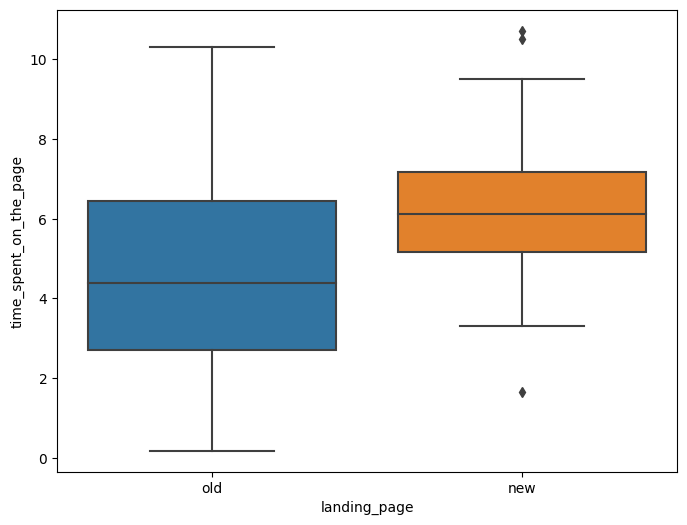

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: On average, users spend the same or less time on the new landing page than on the existing landing page

$H_a$: On average, users spend more time on the new landing page than on the existing landing page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.



*   Since we are analysing two independent samples and the population standard deviations are unknown, it would be advisable to use the independent two-sample t-test.



### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.



*   Since the sample standard deviation of the time spent on the old page is almost 1.5 times larger than that of the time spent on the new page, it can be assumed that the corresponding population standard deviations are unequal. So we will be performing Welch’s t-test which does not assume equal population variance


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference



*   Since the p-value (about 0.01%) is less than the level of significance (𝛼 = 5%), we reject the null hypothesis; thus we have sufficient statistical evidence to conclude that users spend more time on the new landing page than on the existing one





## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

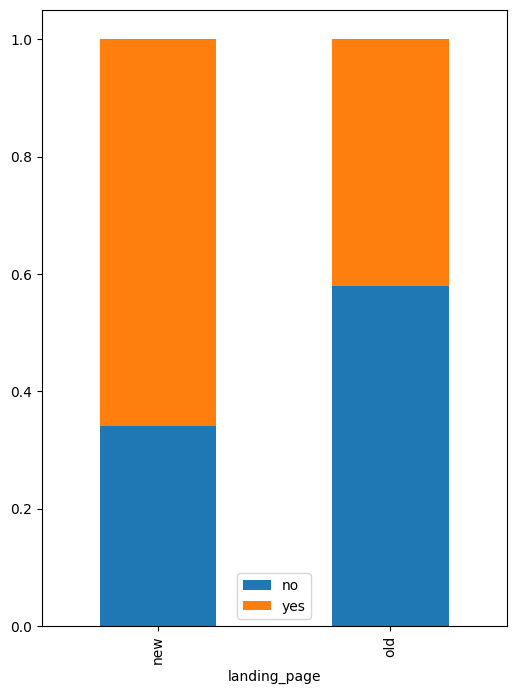

In [ ]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()



*   From the samples, it appears that the new landing page drove conversion, a hypothesis we will be testing shortly



### Step 1: Define the null and alternate hypotheses

$H_0:$ The rate of conversion for the new page is less than or equal to the conversion rate for the old page

$H_a:$ The rate of conversion for the new page is greater than the conversion rate for the old page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.



*   Since we are analyzing two population proportions from independent populations, we will use proportions z-test



### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_treatment, n_control ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest ([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference



*   Since the p-value (about 0.8%) is less than the level of significance (5%), we reject the null hypothesis; we can thus conclude that the rate of conversion for the new page is effectively larger than that for the existing page





## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

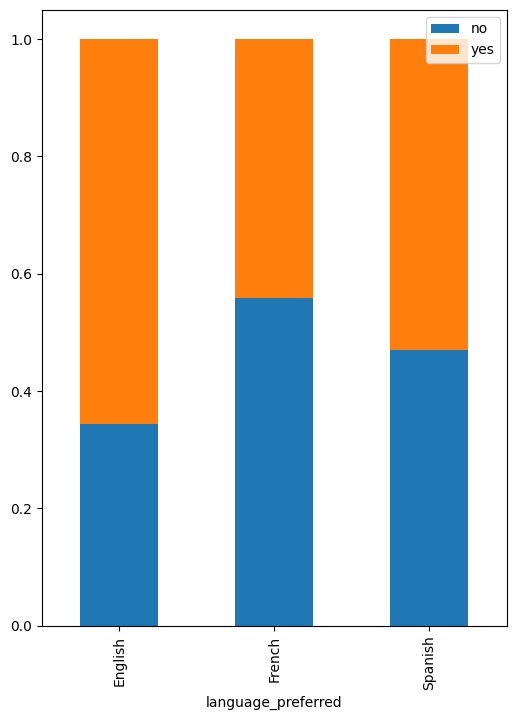

In [ ]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()




*   Subjects whose preferred language is English appear to register the greatest conversion rate whereas French-speaking subjects had the lowest conversion rate



### Step 1: Define the null and alternate hypotheses

$H_0:$ The converted status of a user is independent of their preferred language

$H_a:$ The converted status of users is dependent on their preferred language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**



*   Since we are dealing with a problem of analyzing the independence of two categorical variables and the number in each cell is greater than 5, we will be using chi-square test of independence



### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference



*   Since the p-value (about 21.3%) is greater than the level of significance (𝛼 = 5%), we fail to reject the null hypothesis. Thus, contrary to our expectation drawn from the descriptive analysis of the sample, the converted status appears to be independent of the preferred language of the user; specifically at the level of significance of 5%





## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

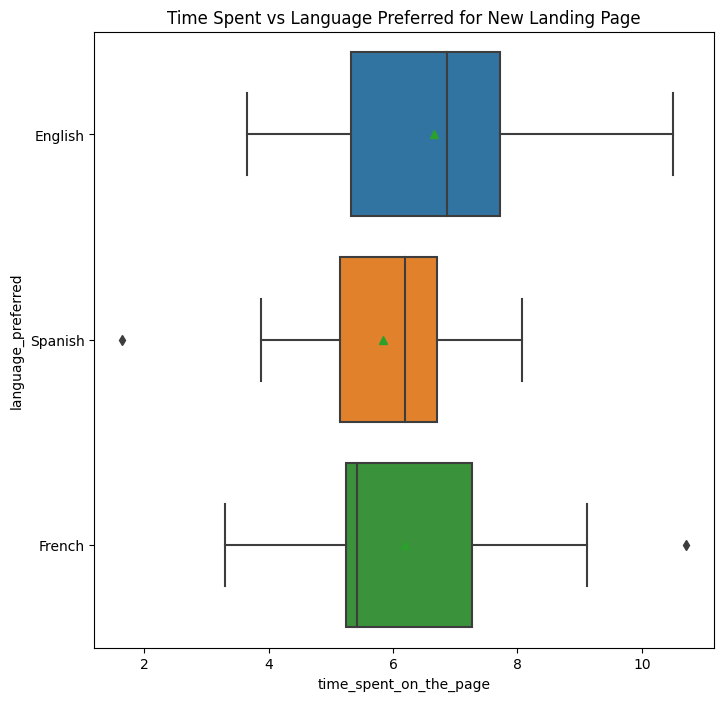

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.title("Time Spent vs Language Preferred for New Landing Page")
plt.show()


In [ ]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64



*   Among subjects assigned to the new landing page, those whose preferred language is English spent the longest time on the landing page whereas French-speaking subjects spent the shortest time on the page
*   The time spent by English and Spanish subjects is left-skewed and at least a left outlier is registered for Spanish subjects; French subjects have a right-skewed time spent distribution and at least a right outlier
*   The average time time spent increases from Spanish subjects through French to English subjects; however, the values are pretty close to each other
*   The time spent by English subjects has the greatest variability whereas that of Spanish subjects is the least variable


### Step 1: Define the null and alternate hypotheses

$H_0:$ The time spent on the new page is the same for the different language users?

$H_a:$ The time spent on the new page is different for at least one group of language users?



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**



*   Assuming that the time spent on the new page has a normal distribution and that the variances for the three language groups are the same (of course, these are not strict assumptions as observed from the samples; we are considering approximations for practical purposes here; alternatively, we could have verified these assumptions using the Shapiro-Wilk and Levene's tests respectively), we will be using the one-way ANOVA test to evaluate the hypothesis that the time spent on the new page is the same across different language users



### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']== "French"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']== "Spanish"]['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway (time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference



*   Since the p-value (about 43.2%) is greater than the level of significance (𝛼 = 5%), we fail to reject the null hypothesis. So, in line with the observation obtained from the descriptive analysis of the sample (specifically that the means are close to each other), we can conclude that the average time spent on the new page is the same across different language users





## Conclusion and Business Recommendations


### Conclusion

#### Exploratory Data Analysis of the Sampled Subjects
*   On average, the subjects spent about 5 minutes 23 seconds (5.38 minutes) on the landing pages
*   The spread of the time spent on the landing page is characterized by a range from about 11 seconds (0.19 minutes) to 10 minutes 42 seconds (10.71 minutes) and a standard deviation of about 2 minutes 23 seconds (2.38 minutes)
*   The randomly selected subjects generated an approximately normal distribution of the time spent on the landing pages
*   The number of subjects converted is slightly greater (54%) than those not converted
*   Half of the subjects spent between 4 and 7 minutes on the landing pages and half also spent more 5 minutes
*   The ratio of subjects converted to those not converted is 27:23
*   Both Spanish and French are the favorite languages among the subjects (34 each) while English was the preferred language of only 32 subjects
*   Subjects assigned to the new landing page tended to spend close to two more minutes on the landing page than those assigned to the old landing page
*   Converted subjects, in general, spent over two more minutes on the landing page than unconverted ones
*  Subjects having English as preferred language spent the most time on the landing page, closely followed by those whose preferred language is Spanish; the least time spent on the landing page was registered for subjects whose preferred language is French but the differences among the time spent by subjects of the three languages are a few seconds apart

#### Inferential Evaluation of Key Statistical Hypotheses

##### Verifying whether users spend more time on the new landing page than the existing landing page?
*   $H_0$: On average, users spend the same or less time on the new landing page than on the existing landing page
*   $H_a$: On average, users spend more time on the new landing page than on the existing landing page
*   Using the Welch’s t-test, since the sample standard deviation of the time spent on the old page is almost 1.5 times larger than that of the time spent on the new page, we determined that the p-value (about 0.01%) is less than the level of significance (𝛼 = 5%); thus we reject the null hypothesis. Therefore, we have sufficient statistical evidence to conclude that, on average, users spend more time on the new landing page than on the existing one

##### Verifying whether the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page
*   $H_0:$ The rate of conversion for the new page is less than or equal to the conversion rate for the old page
*   $H_a:$ The rate of conversion for the new page is greater than the conversion rate for the old page
*   Using the proportions z-tests, since we are analyzing two population proportions from independent populations, we determined that the p-value (about 0.8%) is less than the level of significance (5%); thus we reject the null hypothesis. We, therefore, conclude that the rate of conversion for the new page is effectively larger than that for the existing page

##### Verifying whether the converted status depends on the preferred language
*   $H_0:$ The converted status of a user is independent of their preferred language
*   $H_a:$ The converted status of users is dependent on their preferred language
*   Using chi-square test of independence, since we are dealing with a problem of analyzing the independence of two categorical variables and the number in each cell is greater than 5, we determined that the p-value (about 21.3%) is greater than the level of significance (𝛼 = 5%); thus we fail to reject the null hypothesis. As such, contrary to our expectation drawn from the descriptive analysis of the sample, the converted status appears to be independent of the preferred language of the user; specifically at the level of significance of 5%

##### Verifying whether the time spent on the new page is the same for the different language users?
*   $H_0:$ The time spent on the new page is the same for the different language users
*   $H_a:$ The time spent on the new page is different for at least one group of language users
*   Using the one-way ANOVA test, assuming that the time spent on the new page has a normal distribution and that the variances for the three language groups are the same, we determined that the p-value (about 43.2%) is greater than the level of significance (𝛼 = 5%); thus, we fail to reject the null hypothesis. So, in line with the observation obtained from the descriptive analysis of the sample (specifically that the means are close to each other), we can conclude that the average time spent on the new page is the same across different language users



### Business Recommendations

*   We have successfully determined that the new page generates greater engagement by ensuring longer time spent on the page and a greater rate of conversion; so the business might effectively drive increased subscriber acquisition by deploying and continuously ameliorating the new page
*   We also uncovered that the language choices of the subjects have little or no bearing on the time spent on the new page or conversion rate of users; so language choice might not be a critical business factor for growth
*   By testing and exploring other factors and design considerations, E-news Express may identify other factors that might drive growth and ameliorate customer experience

